### <center><b>Audio Emotion Recognition</b></center>
### <center><b>Part 2 - Feature Extraction</b></center>
###  <center><b>Done By: Sandhya Palaniappan</b></center>

### **Introduction.**
Following on from Part 1, we are now going to explore various techniques for extracting useful features from audio to enhance our classifier. If you're interested, you can revisit Part 1 here where we explored the datasets. I've previously covered some of these techniques in another kernel. However, I haven't comprehensively covered all possible audio features, just the ones with which I'm familiar. Any suggestions or advice are welcome. For a more detailed exploration of various features, I recommend referring to the [PLOS ONE journal](https://journals.plos.org/plosone/article/file?id=10.1371/journal.pone.0144610&type=printable).

Broadly speaking, audio features fall into two categories:
- Time domain features<br/>
These are simpler to extract and understand, such as signal energy, zero-crossing rate, maximum amplitude, and minimum energy.
- Frequency domain features<br/>
These features are derived from converting the time-based signal into the frequency domain. While they are more complex to interpret, they provide valuable additional information such as pitch, rhythm, and melody. Check out the infographic below: <br><br>

This work is part of IT1364 - Data Analysis & Visualisation. <br><br>


![Audio_wave](https://www.nti-audio.com/portals/0/pic/news/FFT-Time-Frequency-View-540.png)
The time vs frequency domain image sourced from __[here](https://www.nti-audio.com/en/support/know-how/fast-fourier-transform-fft)__



Since I've already outlined the various types of features, I'll simplify things here by focusing on MFCC, which is the best feature for this particular problem and will help us establish a quick working baseline. During the phase of improving accuracy, we may expand our feature set to include Mel-Spectrogram, Chroma, HPSS, and others, not just simple mean values.

1. [MFCC quick intro](#mfcc)
2. [Deep dive](#deep)
3. [Statistical features](#stats)
4. [Final thoughts](#final)

I will be going through all of these as part of IT1364 - Data Analysis & Visualisation:
* Part 3 | Baseline model
* Part 4 | Apply to new audio data
* Part 5 | Data augmentation

I want to express my gratitude to the dataset authors for providing excellent resources. Their contributions made this notebook possible.

- [TESS](https://tspace.library.utoronto.ca/handle/1807/24487)
- [CREMA-D](https://github.com/CheyneyComputerScience/CREMA-D)
- [SAVEE](http://kahlan.eps.surrey.ac.uk/savee/Database.html)
- [RAVDESS](https://zenodo.org/record/1188976#.XYP8CSgzaUk)
- [RAVDESS_Kaggle](https://www.kaggle.com/uwrfkaggler/ravdess-emotional-speech-audio)

<a id="mfcc"></a>
## 1. MFCC quick intro
MFCC is well known to be a good feature. And there's many ways you can slice and dice this one feature. But what is MFCC? It stands for Mel-frequency cepstral coefficient, and it is a good "representation" of the vocal tract that produces the sound. Think of it like an x-ray of your mouth

This post has a good deep dive into the [MFCC](https://medium.com/prathena/the-dummys-guide-to-mfcc-aceab2450fd) should you wish to. The most common machine learning application treats the MFCC itself as an 'image' and becomes a feature. The benefit of treating it as an image is that it provides more information, and gives one the ability to draw on transfer learning. This is certainly legit and yields good accuracy. However, research has also shown that statistics relating to MFCCs (or any other time or frequency domain) can carry good amount of information as well. We'll be investigating both of this methods.

In [ ]:
# Import our libraries.
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import pandas as pd
import os
import IPython.display as ipd  # To play sound in the notebook.

<a id="deep"></a>
## 2. Deepdive
We can select a few examples and visualise the MFCC. lets take 2 different emotions and 2 different genders, and play it just to get a feel for what we are dealing with. Ie. whether the data (audio) quality is good. It gives us an early insight as to how likely our classifier is going to be successful.   

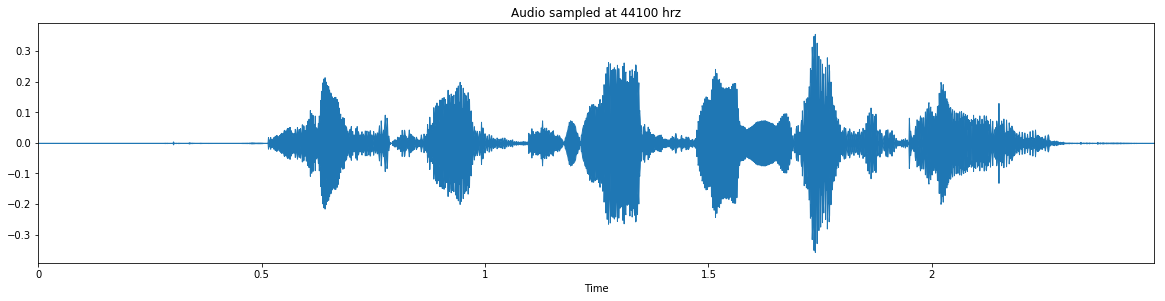

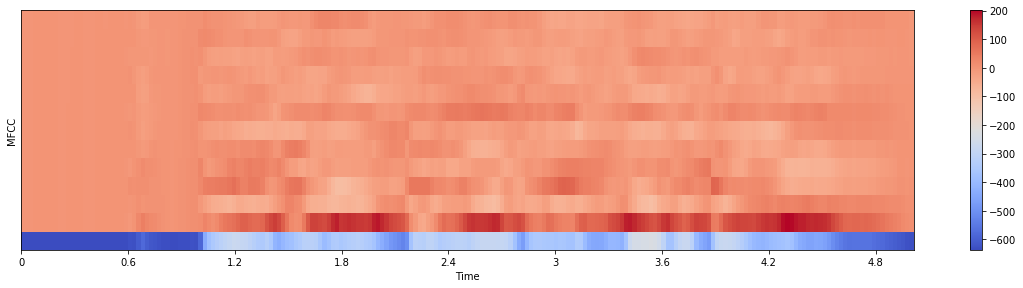

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

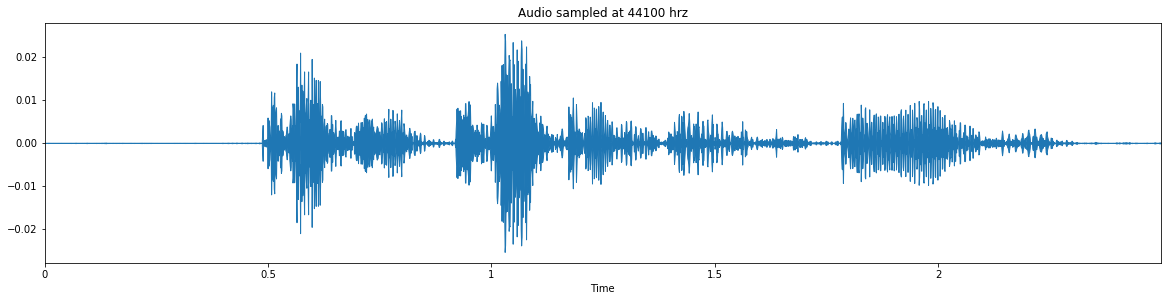

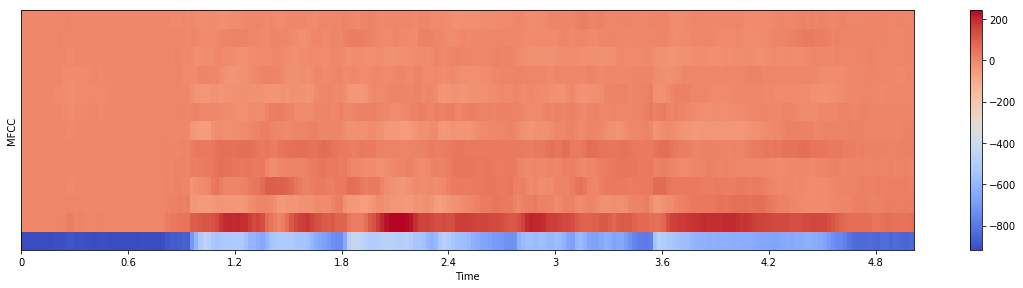

In [ ]:
# Source - RAVDESS; Gender - Male; Emotion - Angry
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

Very placid response from the male counter part...

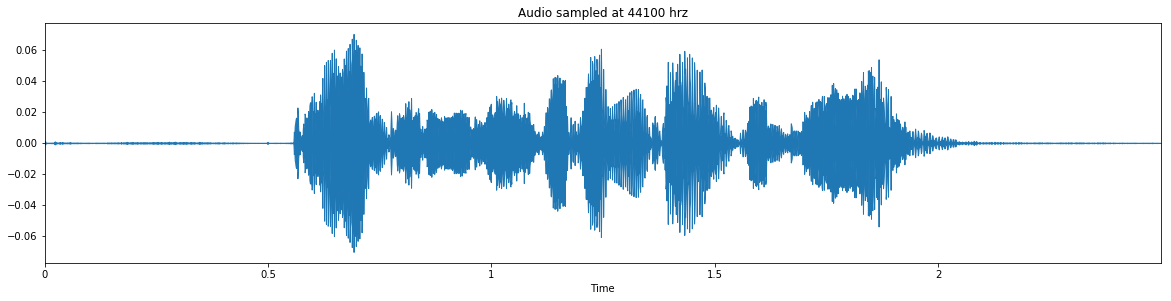

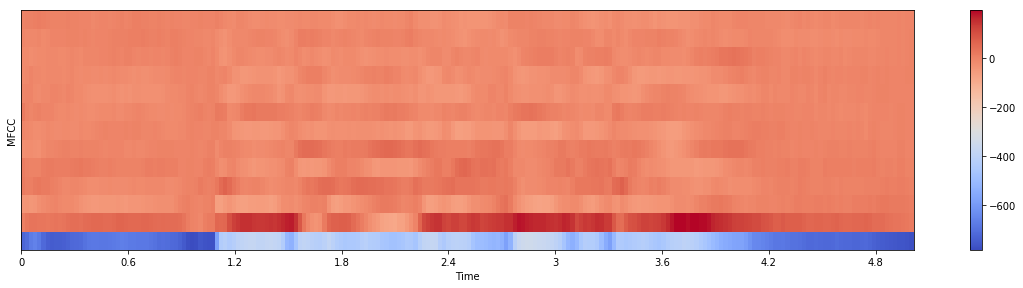

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Happy.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

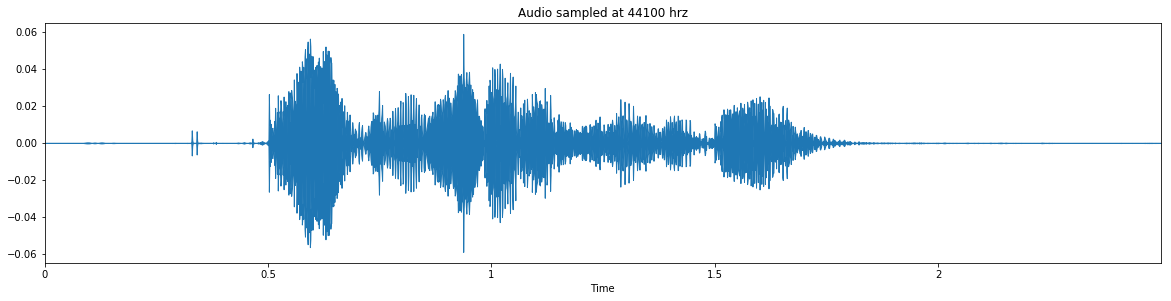

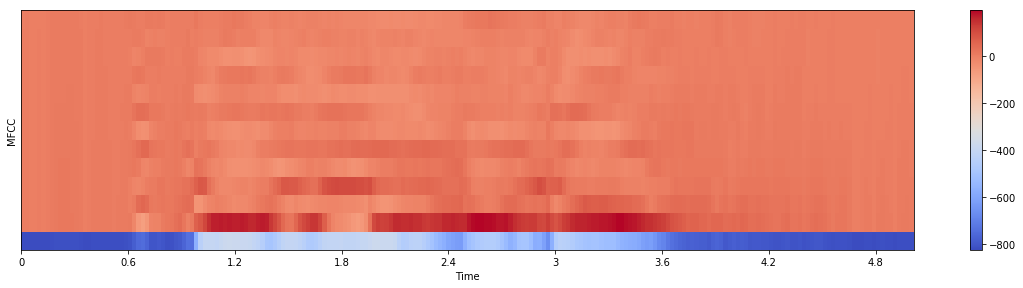

In [ ]:
# Source - RAVDESS; Gender - Male; Emotion - Happy.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
mfcc = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)

# audio wave.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.waveplot(X, sr=sample_rate)
plt.title('Audio sampled at 44100 hrz')

# MFCC.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
librosa.display.specshow(mfcc, x_axis='time')
plt.ylabel('MFCC')
plt.colorbar()

ipd.Audio(path)

<a id="stats"></a>
## 3. Statistical features
Now we've seen the shape of an MFCC output for each file, and it's a 2D matrix format with MFCC bands on the y-axis and time on the x-axis, representing the MFCC bands over time. To simplify things, what we're going to do is take the mean across each band over time. In other words, row means. But how does it present as a distinctive feature?

So if you look at the above MFCC plot, the first band at the bottom is the most distinctive band over the other bands. Since the time window is a short one, the changes observed overtime does not vary greatly. The key feature is capturing the information contained in the various bands. Lets plot the mean of each of the band and display it as a time series plot to illustrate the point.

We'll compare the Angry female and Angry male for the same sentence uttered.

216
216


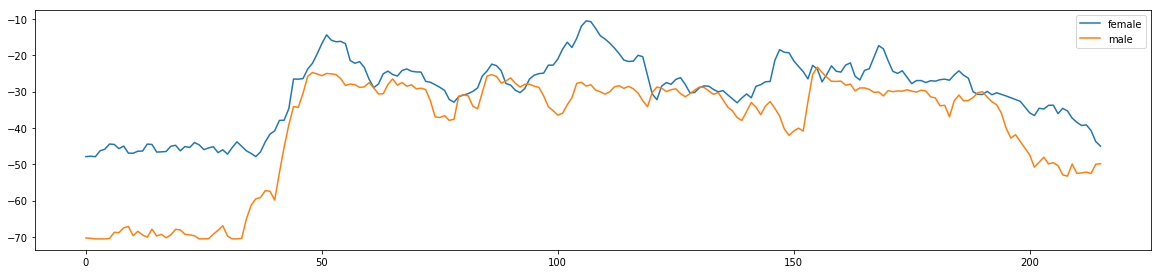

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - Angry.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_08/03-01-05-02-01-01-08.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - Angry.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-01-09.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# audio wave.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

So for the same sentence being uttered, there is a clear distinct difference between male and female in that females tends to have a higher pitch. Lets look at a few others. Lets compare a Happy Female and a Happy Male.

216
216


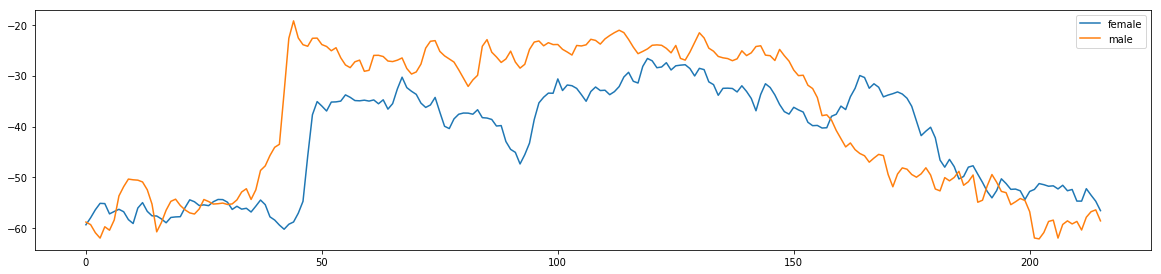

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - happy.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_12/03-01-03-01-02-01-12.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy.
path = "/kaggle/input/ravdess-emotional-speech-audio/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-02-11.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together.
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

<a id="final"></a>
## 4. Final thoughts
Using MFCC is a good feature to differentiate the gender and emotions as demonstrated above. Even though we've ommited alot of good information by just taking the mean, it seems we still capture enough to be able to see some difference. Whether this difference is significant for distinguishing the various emotions, we'll find out in the next part where we will create a baseline emotion classifier.